In [28]:
import pandas as pd

In [29]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [30]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [31]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [32]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [33]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [34]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [35]:
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [37]:
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
display(covid_data.tail())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17645,2020-03-17,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
covid_data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [40]:
covid_data['date'].max()

Timestamp('2021-05-29 00:00:00')

In [41]:
vaccinations_data['date'].min()

Timestamp('2020-12-02 00:00:00')

In [42]:
vaccinations_data['date'].max()

Timestamp('2021-09-06 00:00:00')

In [43]:
covid_df = covid_data.merge(vaccinations_data, how='left', on=['date', 'country'])
display(covid_df.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
covid_df['date'].min()

Timestamp('2020-01-22 00:00:00')

In [45]:
covid_df['date'].max()

Timestamp('2021-05-29 00:00:00')

In [46]:
display(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

None

In [47]:
print(covid_df.shape[0])
print(covid_df.shape[1])

86785
16


In [48]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100

In [49]:
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [50]:
mask_1 = covid_df['country'] == 'United States'
mask_2 = covid_df['death_rate'].notnull()
round(covid_df[mask_1 & mask_2][['death_rate', 'confirmed', 'deaths']].sort_values(by='death_rate'), 2)

,death_rate,confirmed,deaths
82542,0.00,1.0,0.0
82543,0.00,1.0,0.0
82544,0.00,2.0,0.0
82545,0.00,2.0,0.0
82546,0.00,5.0,0.0
...,...,...,...
82657,6.07,1469104.0,89191.0
82654,6.08,1391915.0,84562.0
82655,6.09,1418928.0,86357.0
82656,6.09,1444045.0,87982.0


In [51]:
mask_3 = covid_df['country'] == 'Russia'
#mask_4 = covid_df['recover_rate'].notnull()
print(round(covid_df[mask_3]['recover_rate'].mean(), 2))

67.06


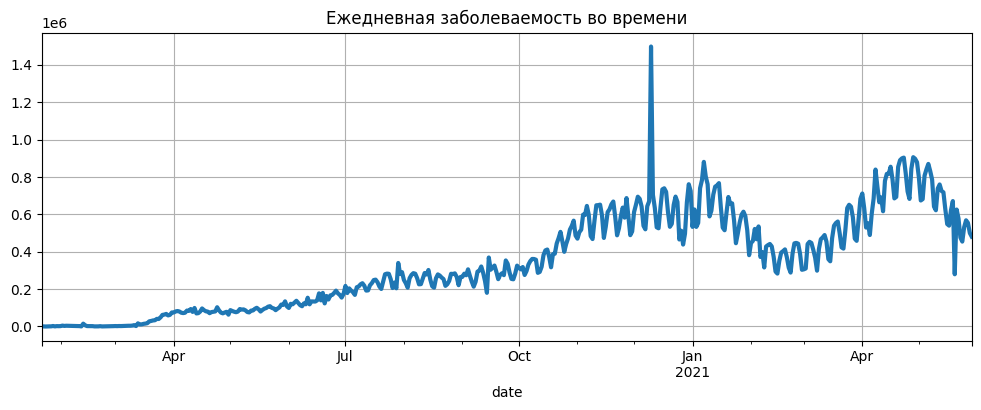

In [52]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

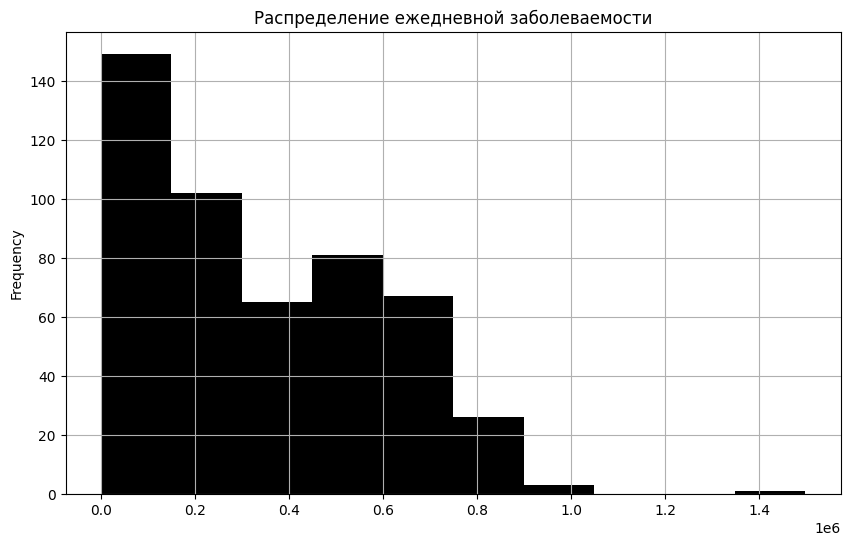

In [59]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

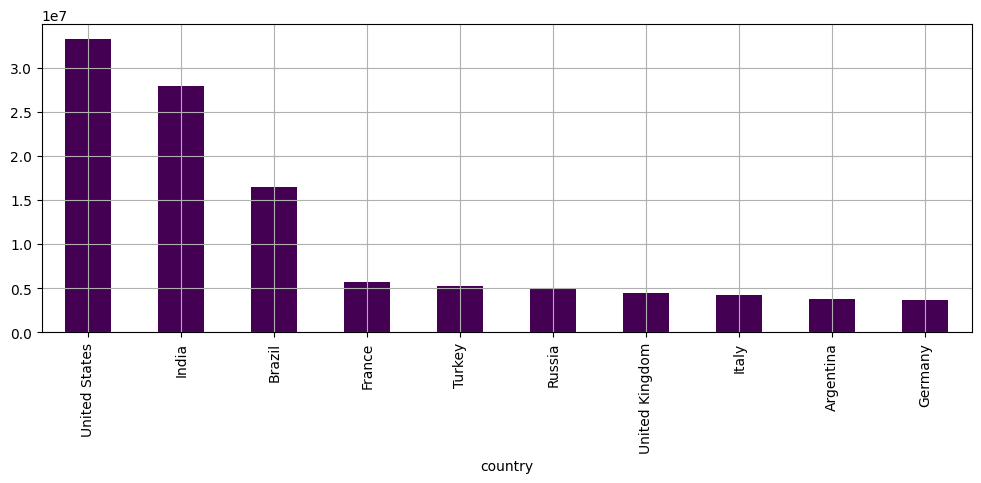

In [62]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='viridis'
);

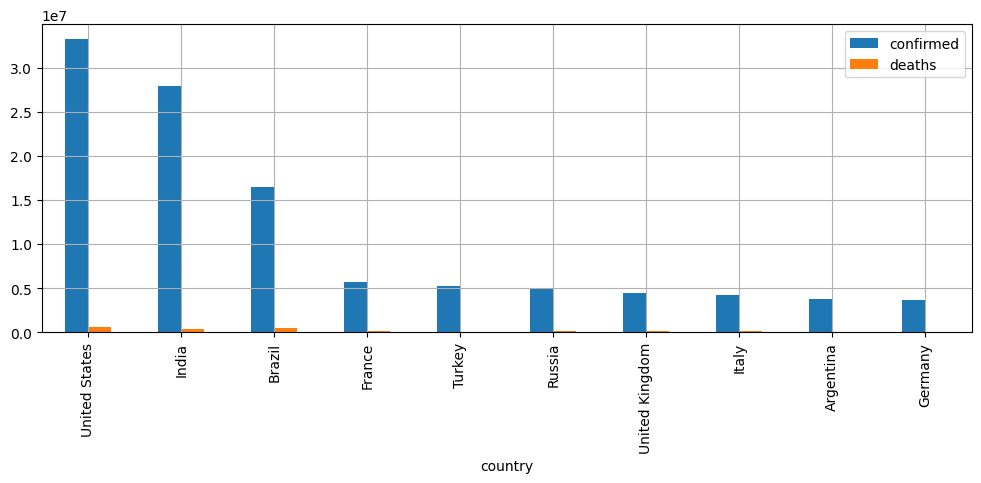

In [63]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

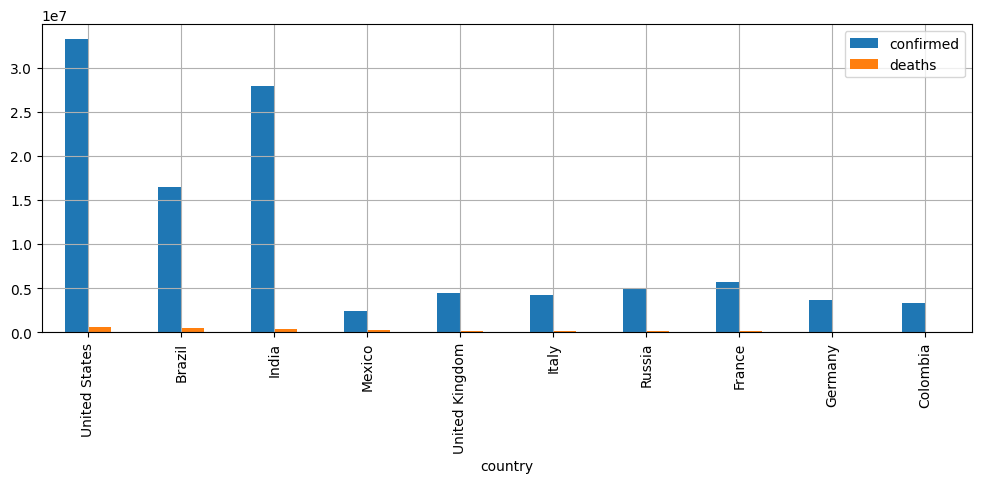

In [64]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

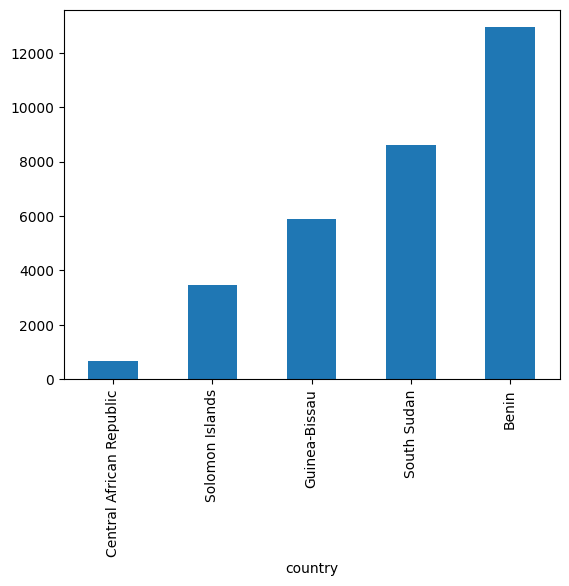

In [65]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

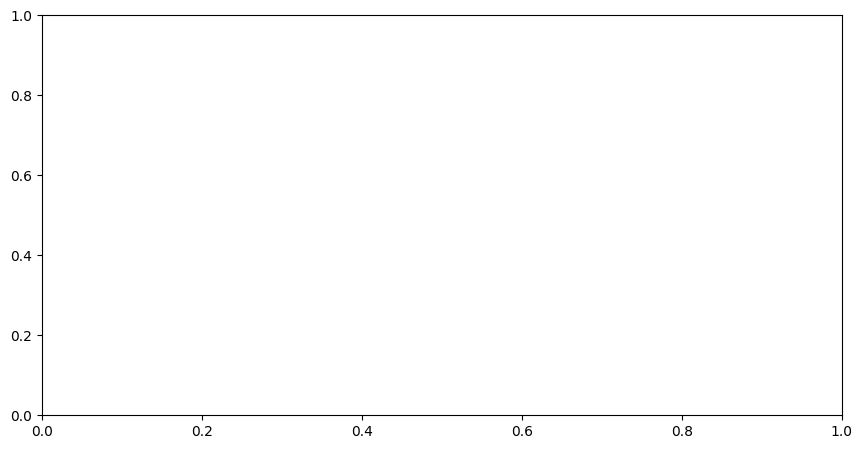

In [68]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

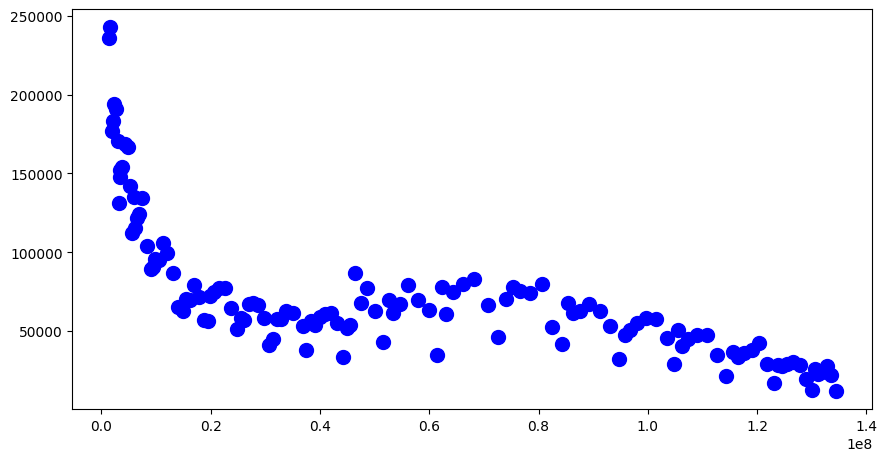

In [69]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

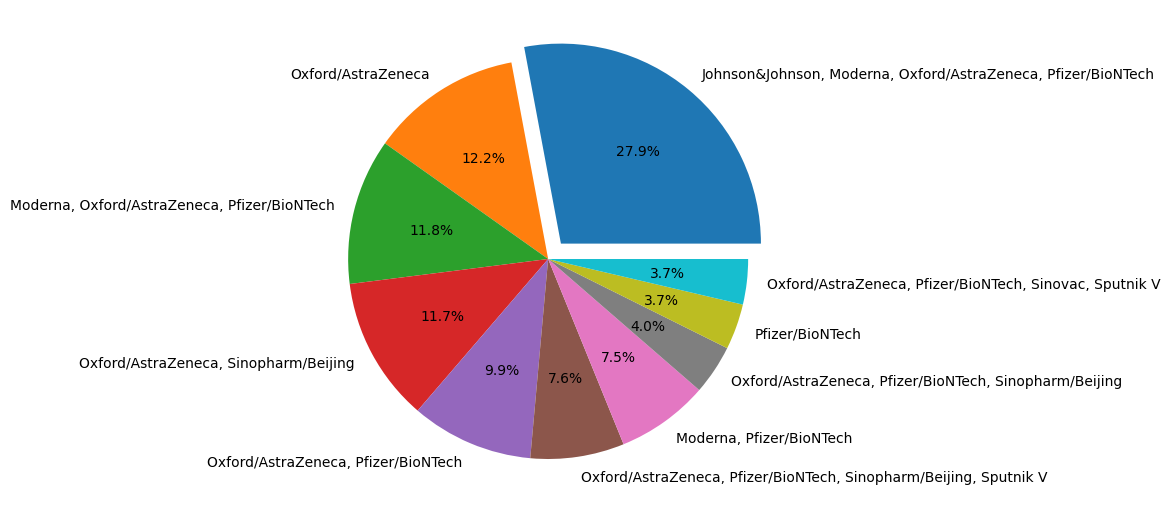

In [70]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [72]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

In [73]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

In [74]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

In [75]:
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

In [76]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

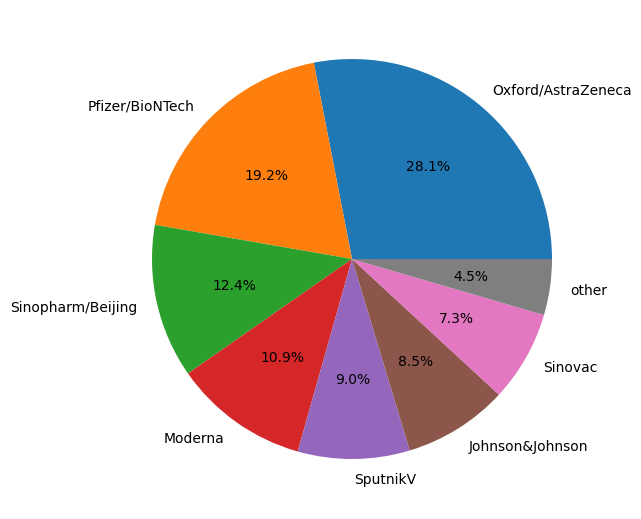

In [77]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);